In [22]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('chinook.db')

# Query 1: Join the tables and select relevant columns
query1 = """
SELECT 
    InvoiceId, 
    GROUP_CONCAT(tracks.Name, ', ') AS PurchasedTracks
FROM 
    invoice_items
INNER JOIN 
    tracks ON invoice_items.TrackId = tracks.TrackId
GROUP BY 
    InvoiceId;
"""

# Save the result of the first query to a CSV file (optional)
df1.to_csv('transactions.csv', index=False)

# Query 2: Select distinct track names
query2 = "SELECT DISTINCT Name FROM tracks;"

# Save the result of the second query to a CSV file (optional)
df2.to_csv('distinct_transactions.csv', index=False)

# Close the database connection
conn.close()


In [23]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the data
data = pd.read_csv('transactions.csv')

# Convert the PurchasedTracks column into a list of lists
transactions = data['PurchasedTracks'].apply(lambda x: x.split(', ')).tolist()

# Use TransactionEncoder to transform the list of lists into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the binary transaction matrix
print(df.head())




     "?"  "Jupiter": IV. Molto allegro  "Moonlight": I. Adagio sostenuto  \
0  False                         False                             False   
1  False                         False                             False   
2  False                         False                             False   
3  False                         False                             False   
4  False                         False                             False   

   #9 Dream  'Round Midnight  (Anesthesia) Pulling Teeth  \
0     False            False                       False   
1     False            False                       False   
2     False            False                       False   
3     False            False                       False   
4     False            False                       False   

   (White Man) In Hammersmith Palais  (Wish I Could) Hideaway  ...And Found  \
0                              False                    False         False   
1                       

In [24]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the data
data = pd.read_csv('transactions.csv')

# Convert the PurchasedTracks column into a list of lists
transactions = data['PurchasedTracks'].apply(lambda x: x.split(', ')).tolist()

# Use TransactionEncoder to transform the list of lists into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the binary transaction matrix
print(df.head())


     "?"  "Jupiter": IV. Molto allegro  "Moonlight": I. Adagio sostenuto  \
0  False                         False                             False   
1  False                         False                             False   
2  False                         False                             False   
3  False                         False                             False   
4  False                         False                             False   

   #9 Dream  'Round Midnight  (Anesthesia) Pulling Teeth  \
0     False            False                       False   
1     False            False                       False   
2     False            False                       False   
3     False            False                       False   
4     False            False                       False   

   (White Man) In Hammersmith Palais  (Wish I Could) Hideaway  ...And Found  \
0                              False                    False         False   
1                       

In [25]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print(frequent_itemsets)


    support       itemsets
0  0.019417        (Pt. 1)
1  0.014563        (Pt. 2)
2  0.012136  (The Trooper)


In [26]:
# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the generated rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


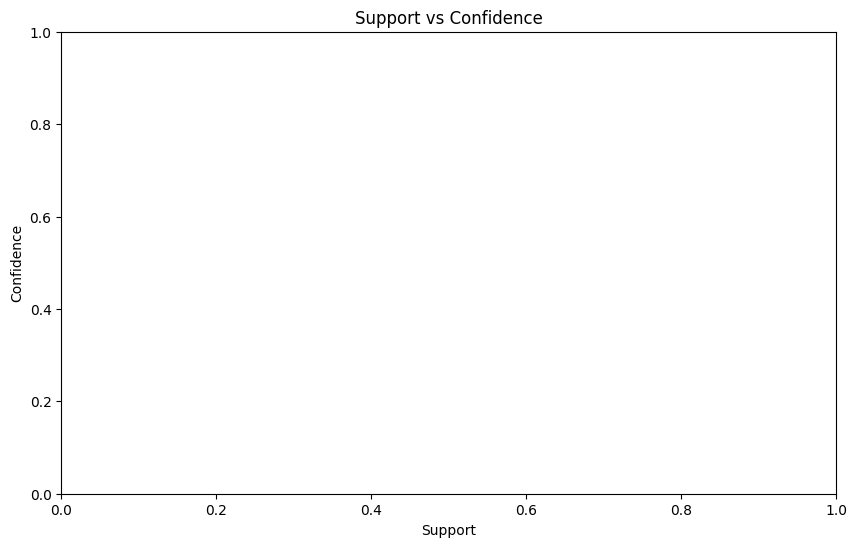

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


In [29]:
frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)
rules.to_csv('association_rules.csv', index=False)